### Exercici 1 (Nivell 1)
#### Agrupa els diferents vols utilitzant l'algorisme de K-means.

In [195]:
#importing python libraries and modules

#libraries & modules
import numpy as np #library for scientific computing
import pandas as pd #library for dataframes 
import matplotlib.pyplot as plt #graphic library
import seaborn as sns #advanced graphic library based on matplotlib
import warnings #library to manage warnings
from kneed import KneeLocator #tool to find number of clusters
from sklearn.cluster import KMeans #tool to apply the kmeans algorithm
from sklearn.metrics import silhouette_score #tool to calculate Silhouette score
from sklearn.preprocessing import StandardScaler #standardizing data tool
from sklearn.decomposition import PCA #Principal components 
from sklearn.cluster import AgglomerativeClustering #hierarchical clustering tool 
import scipy.cluster.hierarchy as sch #hierarchical clustering tool 

warnings.filterwarnings('ignore')

In [196]:
#importing dataset
df_flight_imported = pd.read_csv('DelayedFlights.csv', index_col=0)

#we take a sample to speed up the algorithm
#mainly the dendogram needs a lot of computer work, so I had to reduce observations
df_flight = df_flight_imported.sample(10000)

In [197]:
#dataset information

print(df_flight.info(null_counts=True))
df_flight.describe().transpose()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 3986543 to 676205
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               10000 non-null  int64  
 1   Month              10000 non-null  int64  
 2   DayofMonth         10000 non-null  int64  
 3   DayOfWeek          10000 non-null  int64  
 4   DepTime            10000 non-null  float64
 5   CRSDepTime         10000 non-null  int64  
 6   ArrTime            9963 non-null   float64
 7   CRSArrTime         10000 non-null  int64  
 8   UniqueCarrier      10000 non-null  object 
 9   FlightNum          10000 non-null  int64  
 10  TailNum            10000 non-null  object 
 11  ActualElapsedTime  9960 non-null   float64
 12  CRSElapsedTime     9999 non-null   float64
 13  AirTime            9960 non-null   float64
 14  ArrDelay           9960 non-null   float64
 15  DepDelay           10000 non-null  float64
 16  Origin         

,count,mean,std,min,25%,50%,75%,max
Year,10000.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.00,2008.0
Month,10000.0,6.099000,3.497945,1.0,3.0,6.0,9.00,12.0
DayofMonth,10000.0,15.703000,8.847181,1.0,8.0,16.0,23.00,31.0
DayOfWeek,10000.0,3.965600,2.011224,1.0,2.0,4.0,6.00,7.0
DepTime,10000.0,1519.089000,450.275991,1.0,1210.0,1546.0,1859.00,2400.0
CRSDepTime,10000.0,1470.618900,422.461216,1.0,1144.5,1510.0,1815.00,2359.0
ArrTime,9963.0,1614.704908,544.430713,1.0,1323.0,1719.0,2029.00,2400.0
CRSArrTime,10000.0,1636.791800,461.901277,1.0,1330.0,1705.0,2013.00,2400.0
FlightNum,10000.0,2136.206600,1920.922358,1.0,587.0,1510.0,3334.25,7829.0
ActualElapsedTime,9960.0,133.684036,72.037146,21.0,80.0,116.0,166.00,646.0


- As we have a lot of observations we can delete some features that are not helpful for K-means algorithm and can be computational expensive.
- Categorical features are not useful. 
- Discrete numerical are not useful.
- We will replace NaN values to 0 in the 'xxxDelay' columns because all their NaN values are from empty fields when the flight is on time.

#### Categorical Features to remove
- column 'Unique Carrier'
- column 'TailNum'
- column 'Origin'
- column 'Dest'
- column 'CancellationCode'

#### Discrete numerical to remove
- column 'Cancelled'
- column 'Diverted'
- column 'Year'

#### NaN values replaced by 0
- column 'CarrierDelay'
- column 'WeatherDelay'
- column 'NASDelay'
- column 'SecurityDelay'
- column 'LateAircraftDelay'



In [198]:
#pre-processing

#we make a copy to apply pre-processing
df_flight_pre = df_flight.copy()

#replacing NaN values to 0
columns = ['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']
df_flight_pre[columns] = df_flight_pre[columns].fillna(0)

#removing discrete numerical features
columns = ['Year','Cancelled', 'Diverted']
df_flight_pre.drop(columns=columns, inplace=True)

#removing categorical features
columns = ['UniqueCarrier', 'TailNum', 'Origin', 'Dest','CancellationCode']
df_flight_pre.drop(columns=columns, inplace=True)

#removing the rest of observations with NaN values
df_flight_pre.dropna(inplace=True)


#applying feature engineering (standardization)

#selecting features to standardize
columns = ['Month','DayofMonth','DayOfWeek','DepTime','CRSArrTime','CRSDepTime','ArrTime',
             'FlightNum', 'ActualElapsedTime','CRSElapsedTime',
              'AirTime','DepDelay','ArrDelay','Distance','TaxiIn','TaxiOut',
              'CarrierDelay','WeatherDelay','NASDelay','SecurityDelay',
              'LateAircraftDelay']

#creating scalar
scaler = StandardScaler()
df_flight_sd = df_flight_pre[columns].copy()
columns_sd = scaler.fit_transform(df_flight_pre[columns])
df_flight_sd[columns] = columns_sd

#applying PCA for reducing to 2 dimensions
pca = PCA(n_components=2)
df_flight_pca = pca.fit_transform(df_flight_sd)
df_flight_ok = pd.DataFrame(data = df_flight_pca, columns = ['PC1','PC2'])

- Before using the algorithm we should choose the appropriate number of clusters
- We will use the elbow method that uses SSE metric in relation to clusters.
- SSE is the sum of the squared differences between each observation and its group's mean. The best value should be close to 0.

In [199]:
#applyng elbow methow to know the number of clusters

#arguments
kmeans_kwargs={"init": "random", "n_init": 10, 
               "max_iter": 300, "random_state": 42}

#we calculate SSE values and they are add to a list
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_flight_ok)
    sse.append(kmeans.inertia_)

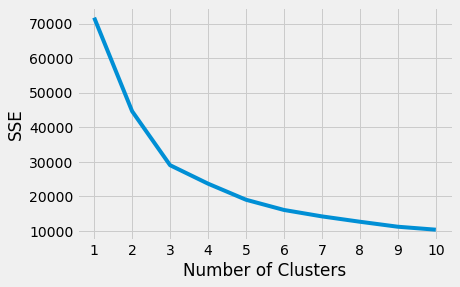

In [200]:
#plotting the elbow graph
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

- SSE is very high. Probably because we have a lot of observations and also outliers.
- We consider that the best number of clusters is between 3 and 5. We choose 3.
- Now we can apply the k-means algorithm with this number of clusters.

In [201]:
#applying kmeans algorithm
kmeans = KMeans(n_clusters=3).fit(df_flight_ok)

#summary of results

#lowest SSE value
print('Lowest SSE value:', int(kmeans.inertia_))

#final locations of the centroid
centroids = kmeans.cluster_centers_
print('\nCentroids:\n', centroids)

#number of iterations required to converge
print('\nNumber of iterations:', kmeans.n_iter_)

#adding cluster labels to original dataframe
df_flight_pre['cluster'] = kmeans.predict(df_flight_ok)

#number of observations by cluster
print('\nNumber of observations by cluster:\n', df_flight_pre['cluster'].value_counts())

#mean values for each cluster, so we can compare and take conclusions
print('\nCluster summary (mean values):')
summary = df_flight_pre.groupby(['cluster']).mean()
summary = summary.sort_values(by='cluster')
print(summary.transpose())


Lowest SSE value: 29040

Centroids:
 [[ 3.51021692 -0.31322965]
 [-0.88254451 -1.27153856]
 [-0.60309999  1.53448107]]

Number of iterations: 10

Number of observations by cluster:
 1    4289
2    3921
0    1750
Name: cluster, dtype: int64

Cluster summary (mean values):
cluster                      0            1            2
Month                 6.142857     6.158778     6.018363
DayofMonth           16.285714    15.542784    15.627136
DayOfWeek             4.030286     3.921427     3.989033
DepTime            1432.507429  1243.349732  1859.803111
CRSDepTime         1411.010286  1212.908370  1779.767661
ArrTime            1595.718286  1379.705293  1880.248151
CRSArrTime         1629.528571  1344.708557  1959.791125
FlightNum           900.570857  2485.790627  2307.330528
ActualElapsedTime   256.902286   102.305666   113.013262
CRSElapsedTime      257.375429   105.183260   112.112216
AirTime             228.328000    80.747960    86.505738
ArrDelay             39.195429    21.445792 

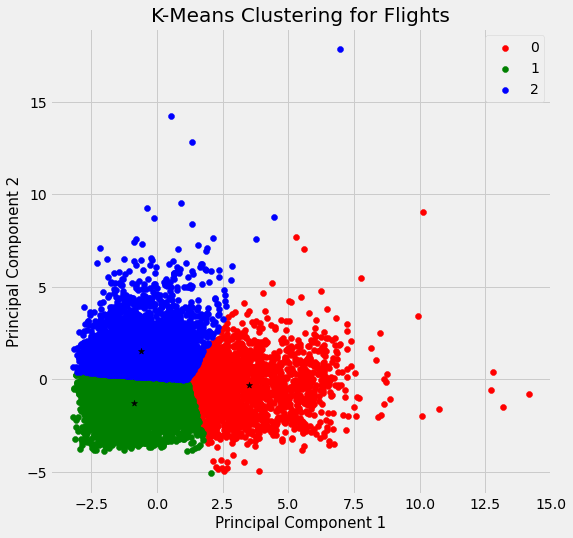

In [202]:
#plotting results

df_flight_ok['cluster'] = kmeans.predict(df_flight_ok)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('K-Means Clustering for Flights', fontsize = 20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df_flight_ok['cluster'] == target
    ax.scatter(df_flight_ok.loc[indicesToKeep, 'PC1']
               , df_flight_ok.loc[indicesToKeep, 'PC2']
               , c = color)
ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=40, label='centroid')
ax.legend(targets)
plt.show()

### Exercici 2 (Nivell 2)
#### Agrupa els diferents vols utilitzant l'algorisme de clustering jeràrquic.

- We plot a dendrogram to visualize how much clusters we need to apply the hierarchical algorithm.
- This graph needs a lot of computer work so we took a sample of 10.000 observations to speed up the plotting.
- The big vertical distance without cutting a branch is 3, then we calculate this algorith for 3 clusters.

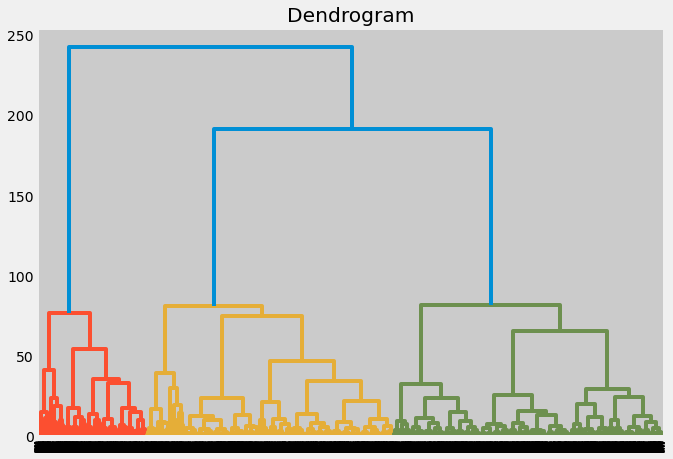

In [203]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrogram")  
dend = sch.dendrogram(sch.linkage(df_flight_ok, method='ward'))

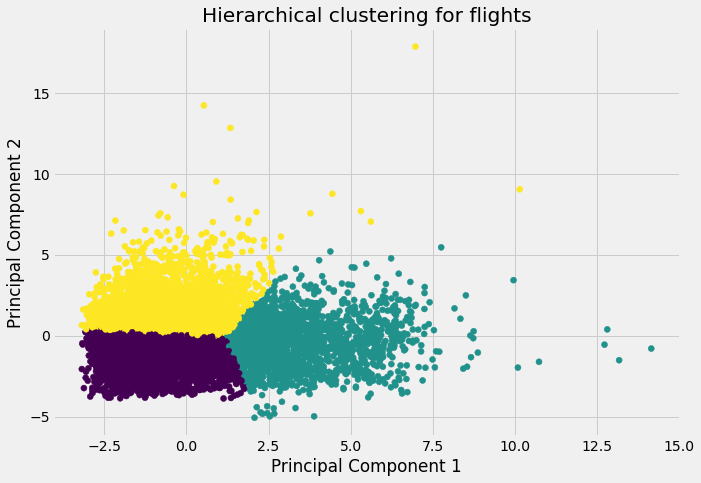

In [204]:
#we use euclidean distance to measure between points 
#and ward linkage to calculate proximity of clusters
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hierarchical_cluster.fit(df_flight_ok)

plt.figure(figsize=(10, 7))  
plt.scatter(df_flight_ok['PC1'], df_flight_ok['PC2'], c=hierarchical_cluster.labels_) 
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title('Hierarchical clustering for flights')
plt.show()


#### Conclusions:
- The graph is very similar from the obtained using the k-means algorithm.

### Exercici 3 (Nivell 3)
#### Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster.

##### Silhoutte Coefficient metrics:
- 1: Clusters are clearly distinguished.
- 0: Clusters are indifferent.
- -1: Clusters are not are well assigned.

In [205]:
#we calculate the silhoutte coefficient for different clusters

#list to keep silhouette coefficients for each k
silhouette_coefficients = []

#arguments to calculate silhoutte
kmeans_kwargs={"init": "random", "n_init": 10, 
               "max_iter": 300, "random_state": 42}

#silhoutte needs at least 2 clusters
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_flight_ok)
    score = silhouette_score(df_flight_ok, kmeans.labels_)
    silhouette_coefficients.append(score)
    print('Clusters:', k, '-> Silhouette score:',round(score,3))


Clusters: 2 -> Silhoutte score: 0.46
Clusters: 3 -> Silhoutte score: 0.417
Clusters: 4 -> Silhoutte score: 0.366
Clusters: 5 -> Silhoutte score: 0.356
Clusters: 6 -> Silhoutte score: 0.357
Clusters: 7 -> Silhoutte score: 0.356
Clusters: 8 -> Silhoutte score: 0.364
Clusters: 9 -> Silhoutte score: 0.375
Clusters: 10 -> Silhoutte score: 0.37


#### Conclusions:
- according to silhouette coefficient the best number of clusters is 2. And the worst number is 5. These results are different than the results obtained from SSE metric or the dendogram.
- We have use 3 clusters, so silhouette score is not the best, we should use only 2 clusters according to this.

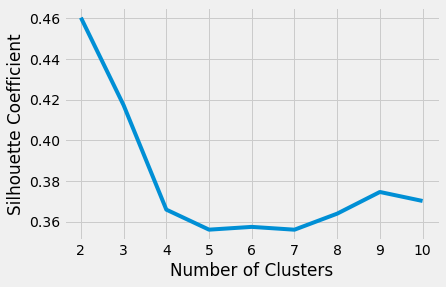

In [206]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()